In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
df.shape

(271116, 15)

In [5]:
df= df[df['Season']=='Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

In [8]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [9]:
# left joining region_df and df
df= df.merge(region_df,on='NOC',how='left')

In [10]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [11]:
#how many countries participated
df['region'].unique().shape

(206,)

In [12]:
#how many missing values in df
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
#duplicate rows
df.duplicated().sum()

1385

In [14]:
# removing duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
#duplicate rows
df.duplicated().sum()

0

In [16]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [17]:
#created new columns to count no. of medals and concatinated df and those three columns
df= pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [18]:
df.shape

(221167, 20)

In [19]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  Bronze  Gold  Silver  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0

In [20]:
df.groupby('NOC')[['Gold', 'Silver', 'Bronze']].sum(numeric_only=True).sort_values('Gold',ascending=False).reset_index()


NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [21]:
#this is counting individual medals for a team event that's why the medal count for each country is not correct
df[(df['NOC']== 'IND') & (df['Medal'] == 'Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

In [22]:
#removing duplicate rows basesd on few coloumns
#it will remove the redundant values
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [23]:
medal_tally

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

In [24]:
medal_tally= medal_tally.groupby('NOC')[['Gold', 'Silver', 'Bronze']].sum(numeric_only=True).sort_values('Gold',ascending=False).reset_index()


In [25]:
medal_tally[medal_tally['NOC'] == 'IND']

NOC  Gold  Silver  Bronze
53  IND     9       7      12

In [26]:
medal_tally['total']= medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [27]:
medal_tally

NOC  Gold  Silver  Bronze  total
0    USA  1035     802     708   2545
1    URS   394     317     294   1005
2    GBR   278     317     300    895
3    GER   235     261     283    779
4    FRA   234     256     287    777
..   ...   ...     ...     ...    ...
225  AHO     0       1       0      1
226  LBR     0       0       0      0
227  LCA     0       0       0      0
228  LES     0       0       0      0
229  LBA     0       0       0      0

[230 rows x 5 columns]

In [28]:
years = df['Year'].unique().tolist()

In [29]:
years.sort()

In [30]:
years.insert(0,'Overall')

In [31]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [32]:
country = np.unique(df['region'].dropna().values).tolist()

In [33]:
country.sort()

In [34]:
country.insert(0,'Overall')

In [35]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [36]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[ (medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
    
    if flag==1:
            x = temp_df.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum(numeric_only=True).sort_values('Year').reset_index()
    else:
            x = temp_df.groupby('region')[['Gold', 'Silver', 'Bronze']].sum(numeric_only=True).sort_values('Gold',ascending=False).reset_index()
    x['total']= x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [37]:
fetch_medal_tally(df,year='1900',country='India')

  region  Gold  Silver  Bronze  total
0  India     0       2       0      2


In [38]:
#removing duplicate rows basesd on few coloumns
#it will remove the redundant values
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [39]:
medal_df[medal_df['region'] == 'India']

ID                                           Name Sex   Age  \
436        281                                 S. Abdul Hamid   M   NaN   
437        281                                 S. Abdul Hamid   M   NaN   
790        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
791        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
792        512                Shiny Kurisingal Abraham-Wilson   F  23.0   
...        ...                                            ...  ..   ...   
216942  132143                            Vikas Krishan Yadav   M  24.0   
216985  132177                           Mohammad Anas Yahiya   M  21.0   
218411  133029  Thyadathuvilla Chandrapillai "T. C." Yohannan   M  29.0   
222416  135480                                   Geeta Zutshi   F  23.0   
222417  135480                                   Geeta Zutshi   F  27.0   

        Height  Weight   Team  NOC        Games  Year  Season            City  \
436        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
437        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
790      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
791      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
792      167.0    53.0  India  IND  1988 Summer  1988  Summer           Seoul   
...        ...     ...    ...  ...          ...   ...     ...             ...   
216942   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
216985   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
218411   174.0    62.0  India  IND  1976 Summer  1976  Summer        Montreal   
222416   167.0    51.0  India  IND  1980 Summer  1980  Summer          Moskva   
222417   167.0    51.0  India  IND  1984 Summer  1984  Summer     Los Angeles   

            Sport                                   Event Medal region notes  \
436     Athletics      Athletics Men's 110 metres Hurdles   NaN  India   NaN   
437     Athletics      Athletics Men's 400 metres Hurdles   NaN  India   NaN   
790     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
791     Athletics  Athletics Women's 4 x 400 metres Relay   NaN  India   NaN   
792     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
...           ...                                     ...   ...    ...   ...   
216942     Boxing               Boxing Men's Middleweight   NaN  India   NaN   
216985  Athletics              Athletics Men's 400 metres   NaN  India   NaN   
218411  Athletics               Athletics Men's Long Jump   NaN  India   NaN   
222416  Athletics            Athletics Women's 800 metres   NaN  India   NaN   
222417  Athletics          Athletics Women's 3,000 metres   NaN  India   NaN   

        Bronze  Gold  Silver  
436          0     0       0  
437          0     0       0  
790          0     0       0  
791          0     0       0  
792          0     0       0  
...        ...   ...     ...  
216942       0     0       0  
216985       0     0       0  
218411       0     0       0  
222416       0     0       0  
222417       0     0       0  

[687 rows x 20 columns]

In [40]:
medal_df[medal_df['Year'] == 2016]

ID                             Name Sex   Age  Height  Weight  \
34          22                    Andreea Aanei   F  22.0   170.0   125.0   
77          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
78          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
79          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
80          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
...        ...                              ...  ..   ...     ...     ...   
222327  135410        Zaidatul Husniah Zulkifli   F  22.0   156.0    40.0   
222346  135421  Goretti Alejandra Zumaya Flores   F  19.0   165.0    65.0   
222383  135453                  Kelita Zupancic   F  26.0   169.0    70.0   
222407  135478                Henrikas ustautas   M  22.0   192.0    96.0   
222500  135528                    Marc Zwiebler   M  32.0   181.0    75.0   

             Team  NOC        Games  Year  Season            City  \
34        Romania  ROU  2016 Summer  2016  Summer  Rio de Janeiro   
77          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
78          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
79          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
80          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
...           ...  ...          ...   ...     ...             ...   
222327   Malaysia  MAS  2016 Summer  2016  Summer  Rio de Janeiro   
222346     Mexico  MEX  2016 Summer  2016  Summer  Rio de Janeiro   
222383     Canada  CAN  2016 Summer  2016  Summer  Rio de Janeiro   
222407  Lithuania  LTU  2016 Summer  2016  Summer  Rio de Janeiro   
222500    Germany  GER  2016 Summer  2016  Summer  Rio de Janeiro   

                Sport                                        Event Medal  \
34      Weightlifting      Weightlifting Women's Super-Heavyweight   NaN   
77         Gymnastics       Gymnastics Men's Individual All-Around   NaN   
78         Gymnastics              Gymnastics Men's Floor Exercise   NaN   
79         Gymnastics               Gymnastics Men's Parallel Bars   NaN   
80         Gymnastics              Gymnastics Men's Horizontal Bar   NaN   
...               ...                                          ...   ...   
222327      Athletics                 Athletics Women's 100 metres   NaN   
222346       Shooting        Shooting Women's Air Rifle, 10 metres   NaN   
222383           Judo                    Judo Women's Middleweight   NaN   
222407       Canoeing  Canoeing Men's Canadian Singles, 200 metres   NaN   
222500      Badminton                      Badminton Men's Singles   NaN   

           region notes  Bronze  Gold  Silver  
34        Romania   NaN       0     0       0  
77          Spain   NaN       0     0       0  
78          Spain   NaN       0     0       0  
79          Spain   NaN       0     0       0  
80          Spain   NaN       0     0       0  
...           ...   ...     ...   ...     ...  
222327   Malaysia   NaN       0     0       0  
222346     Mexico   NaN       0     0       0  
222383     Canada   NaN       0     0       0  
222407  Lithuania   NaN       0     0       0  
222500    Germany   NaN       0     0       0  

[7494 rows x 20 columns]

In [41]:
medal_df[ (medal_df['Year'] == 2016) & (medal_df['region'] == 'India')]


ID                      Name Sex   Age  Height  Weight   Team  \
1015       663     Sharath Kamal Achanta   M  34.0   186.0    85.0  India   
7065      4523               Seema Antil   F  33.0   182.0    92.0  India   
8713      5562               Aditi Ashok   F  18.0   173.0    57.0  India   
9202      5868                Manu Attri   M  23.0   172.0    73.0  India   
10070     6427      Lalita Shivaji Babar   F  27.0   166.0    50.0  India   
...        ...                       ...  ..   ...     ...     ...    ...   
182260  111467  Sathish Kumar Sivalingam   M  24.0   175.0    77.0  India   
195568  119515               Shiva Thapa   M  22.0   169.0    56.0  India   
198042  120871             Sandeep Tomar   M  25.0   168.0    61.0  India   
216942  132143       Vikas Krishan Yadav   M  24.0   177.0    69.0  India   
216985  132177      Mohammad Anas Yahiya   M  21.0   177.0    69.0  India   

        NOC        Games  Year  Season            City          Sport  \
1015    IND  2016 Summer  2016  Summer  Rio de Janeiro   Table Tennis   
7065    IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
8713    IND  2016 Summer  2016  Summer  Rio de Janeiro           Golf   
9202    IND  2016 Summer  2016  Summer  Rio de Janeiro      Badminton   
10070   IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
...     ...          ...   ...     ...             ...            ...   
182260  IND  2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting   
195568  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
198042  IND  2016 Summer  2016  Summer  Rio de Janeiro      Wrestling   
216942  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
216985  IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   

                                              Event Medal region notes  \
1015                     Table Tennis Men's Singles   NaN  India   NaN   
7065                 Athletics Women's Discus Throw   NaN  India   NaN   
8713                        Golf Women's Individual   NaN  India   NaN   
9202                        Badminton Men's Doubles   NaN  India   NaN   
10070   Athletics Women's 3,000 metres Steeplechase   NaN  India   NaN   
...                                             ...   ...    ...   ...   
182260             Weightlifting Men's Middleweight   NaN  India   NaN   
195568                    Boxing Men's Bantamweight   NaN  India   NaN   
198042     Wrestling Men's Featherweight, Freestyle   NaN  India   NaN   
216942                    Boxing Men's Middleweight   NaN  India   NaN   
216985                   Athletics Men's 400 metres   NaN  India   NaN   

        Bronze  Gold  Silver  
1015         0     0       0  
7065         0     0       0  
8713         0     0       0  
9202         0     0       0  
10070        0     0       0  
...        ...   ...     ...  
182260       0     0       0  
195568       0     0       0  
198042       0     0       0  
216942       0     0       0  
216985       0     0       0  

[68 rows x 20 columns]

In [42]:
df['Year'].unique().shape[0]-1

28

In [43]:
df['City'].unique().shape

(23,)

In [44]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [45]:
df['Sport'].unique().shape

(52,)

In [46]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [47]:
df['Event'].unique().shape

(651,)

In [48]:
df['Name'].unique().shape

(116122,)

In [49]:
df['region'].unique().shape

(206,)

In [50]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [51]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [52]:
nations_over_time.rename(columns= {'index':'Edition','Year':'No. of Countries'},inplace=True)

In [53]:
import plotly.express as px

In [54]:
fig = px.line(nations_over_time, x="Edition",y="No. of Countries")
fig.show()

In [55]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

index  Year
28   1896    43
26   1900    90
25   1904    95
27   1906    74
23   1908   109
24   1912   107
14   1920   158
20   1924   131
22   1928   122
21   1932   131
18   1936   150
15   1948   153
19   1952   149
16   1956   151
17   1960   150
13   1964   163
12   1968   172
11   1972   193
10   1976   198
9    1980   203
8    1984   221
7    1988   237
6    1992   257
5    1996   271
4    2000   300
3    2004   301
1    2008   302
2    2012   302
0    2016   306

In [56]:
x= df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

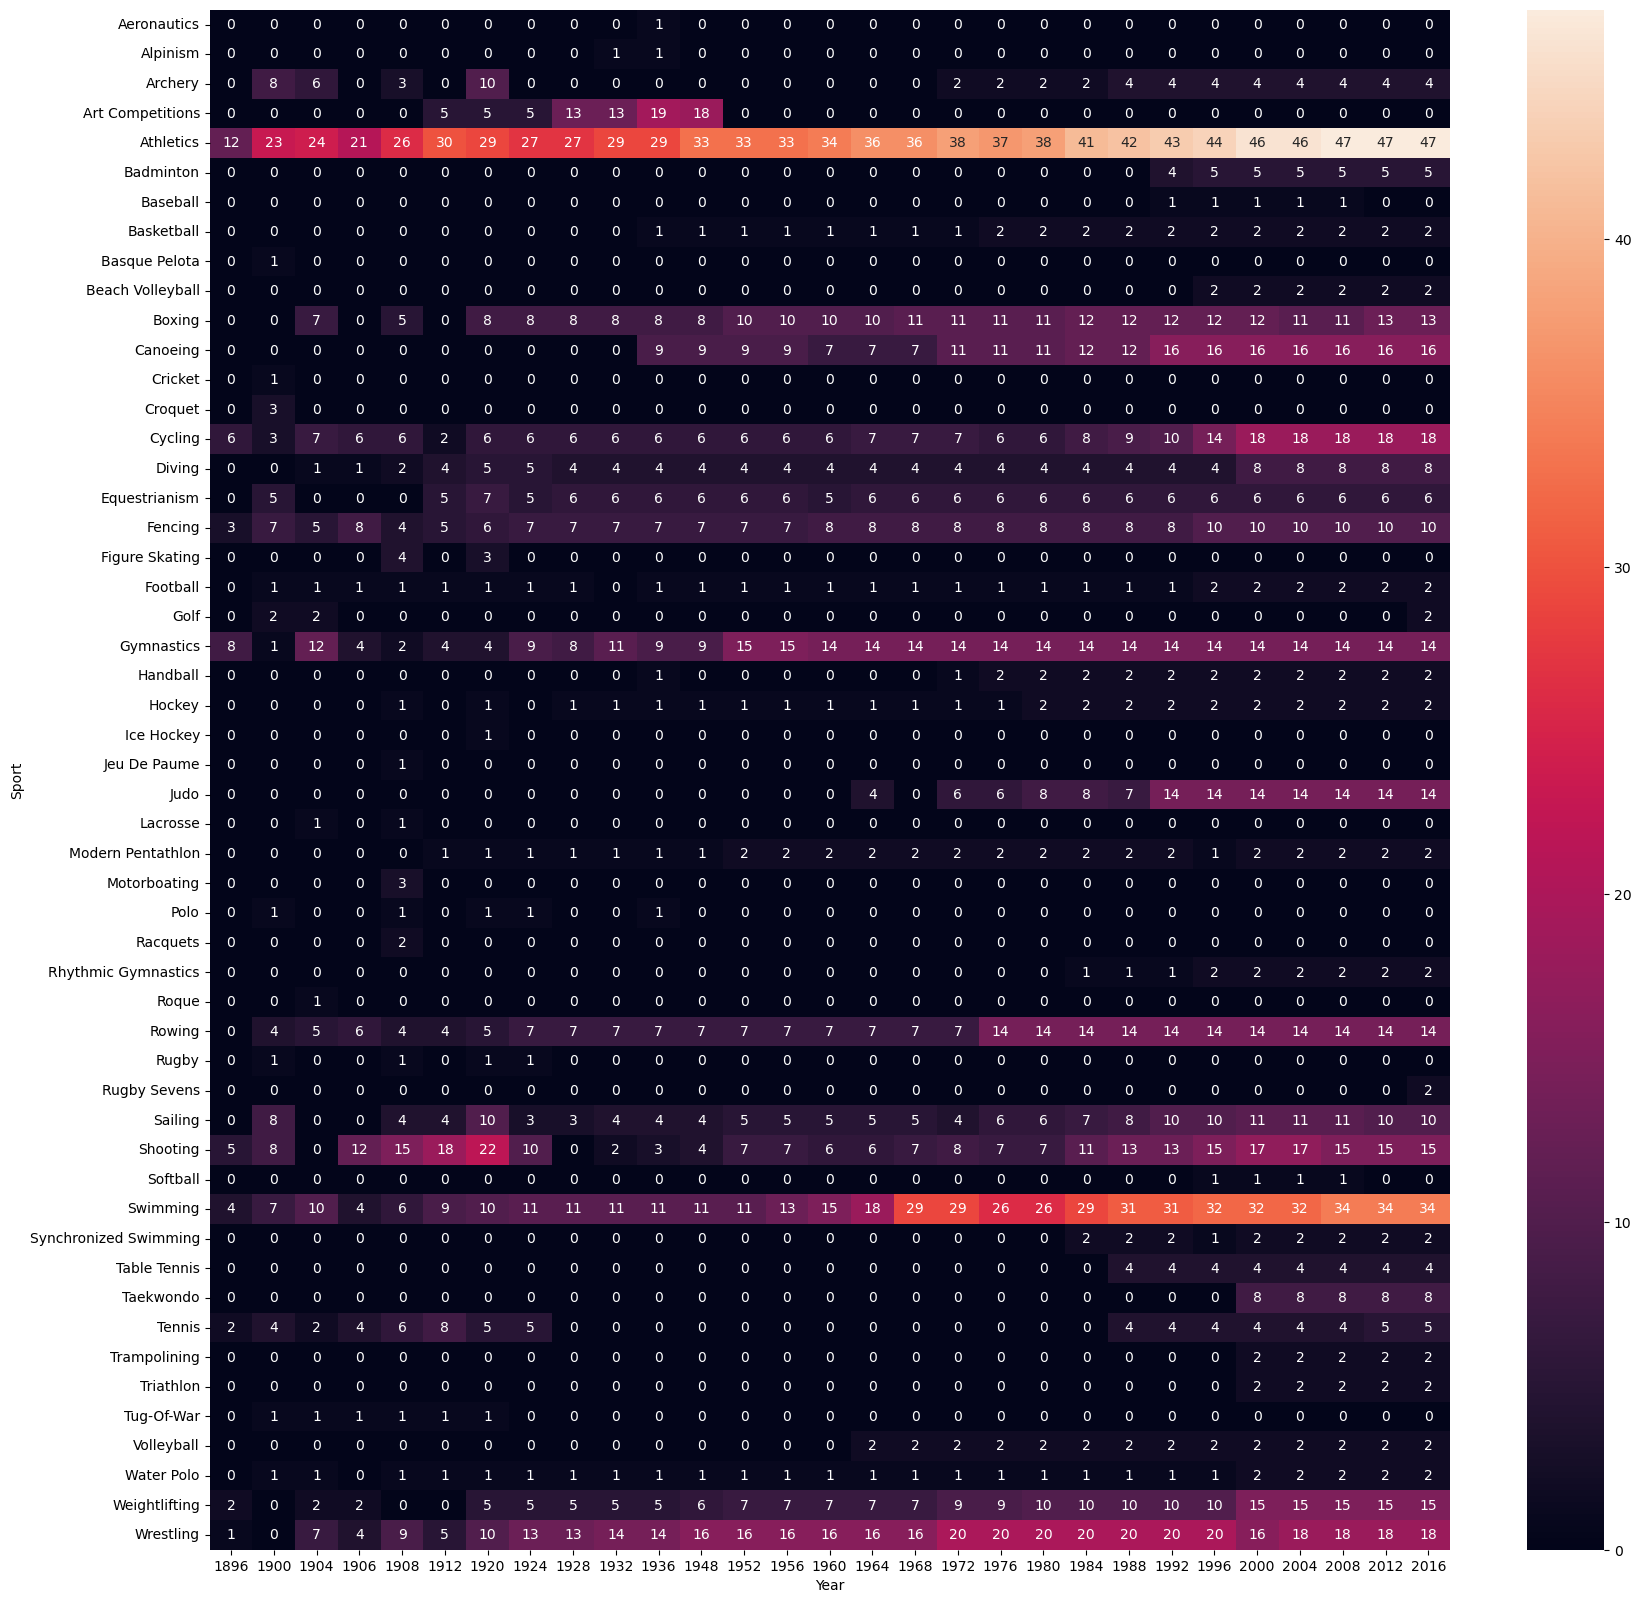

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [58]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']== sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [59]:
most_successful(df,'Gymnastics')

Name  Medals       Sport          region
0    Larysa Semenivna Latynina (Diriy-)      18  Gymnastics          Russia
19         Nikolay Yefimovich Andrianov      15  Gymnastics          Russia
43          Borys Anfiyanovych Shakhlin      13  Gymnastics          Russia
67                          Takashi Ono      13  Gymnastics           Japan
100                          Sawao Kato      12  Gymnastics           Japan
124             Aleksey Yuryevich Nemov      12  Gymnastics          Russia
145           Viktor Ivanovych Chukarin      11  Gymnastics          Russia
161              Vra slavsk (-Odloilov)      11  Gymnastics  Czech Republic
179           gnes Keleti-Srkny (Klein)      10  Gymnastics         Hungary
193       Vitaly Venediktovich Shcherbo      10  Gymnastics          Russia
209     Aleksandr Nikolayevich Dityatin      10  Gymnastics          Russia
225         Polina Hryhorivna Astakhova      10  Gymnastics          Russia
244                    Akinori Nakayama      10  Gymnastics           Japan
260       Nadia Elena Comneci (-Conner)       9  Gymnastics         Romania
272           Yury Yevlampiyevich Titov       9  Gymnastics          Russia

In [60]:
print("Country wise Analysis")

Country wise Analysis


In [61]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\Sambitee\AppData\Local\Temp\ipykernel_2140\3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
new_df = temp_df[temp_df['region']=='USA']
final_df= new_df.groupby('Year').count()['Medal'].reset_index()

In [63]:
fig = px.line(final_df, x="Year",y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

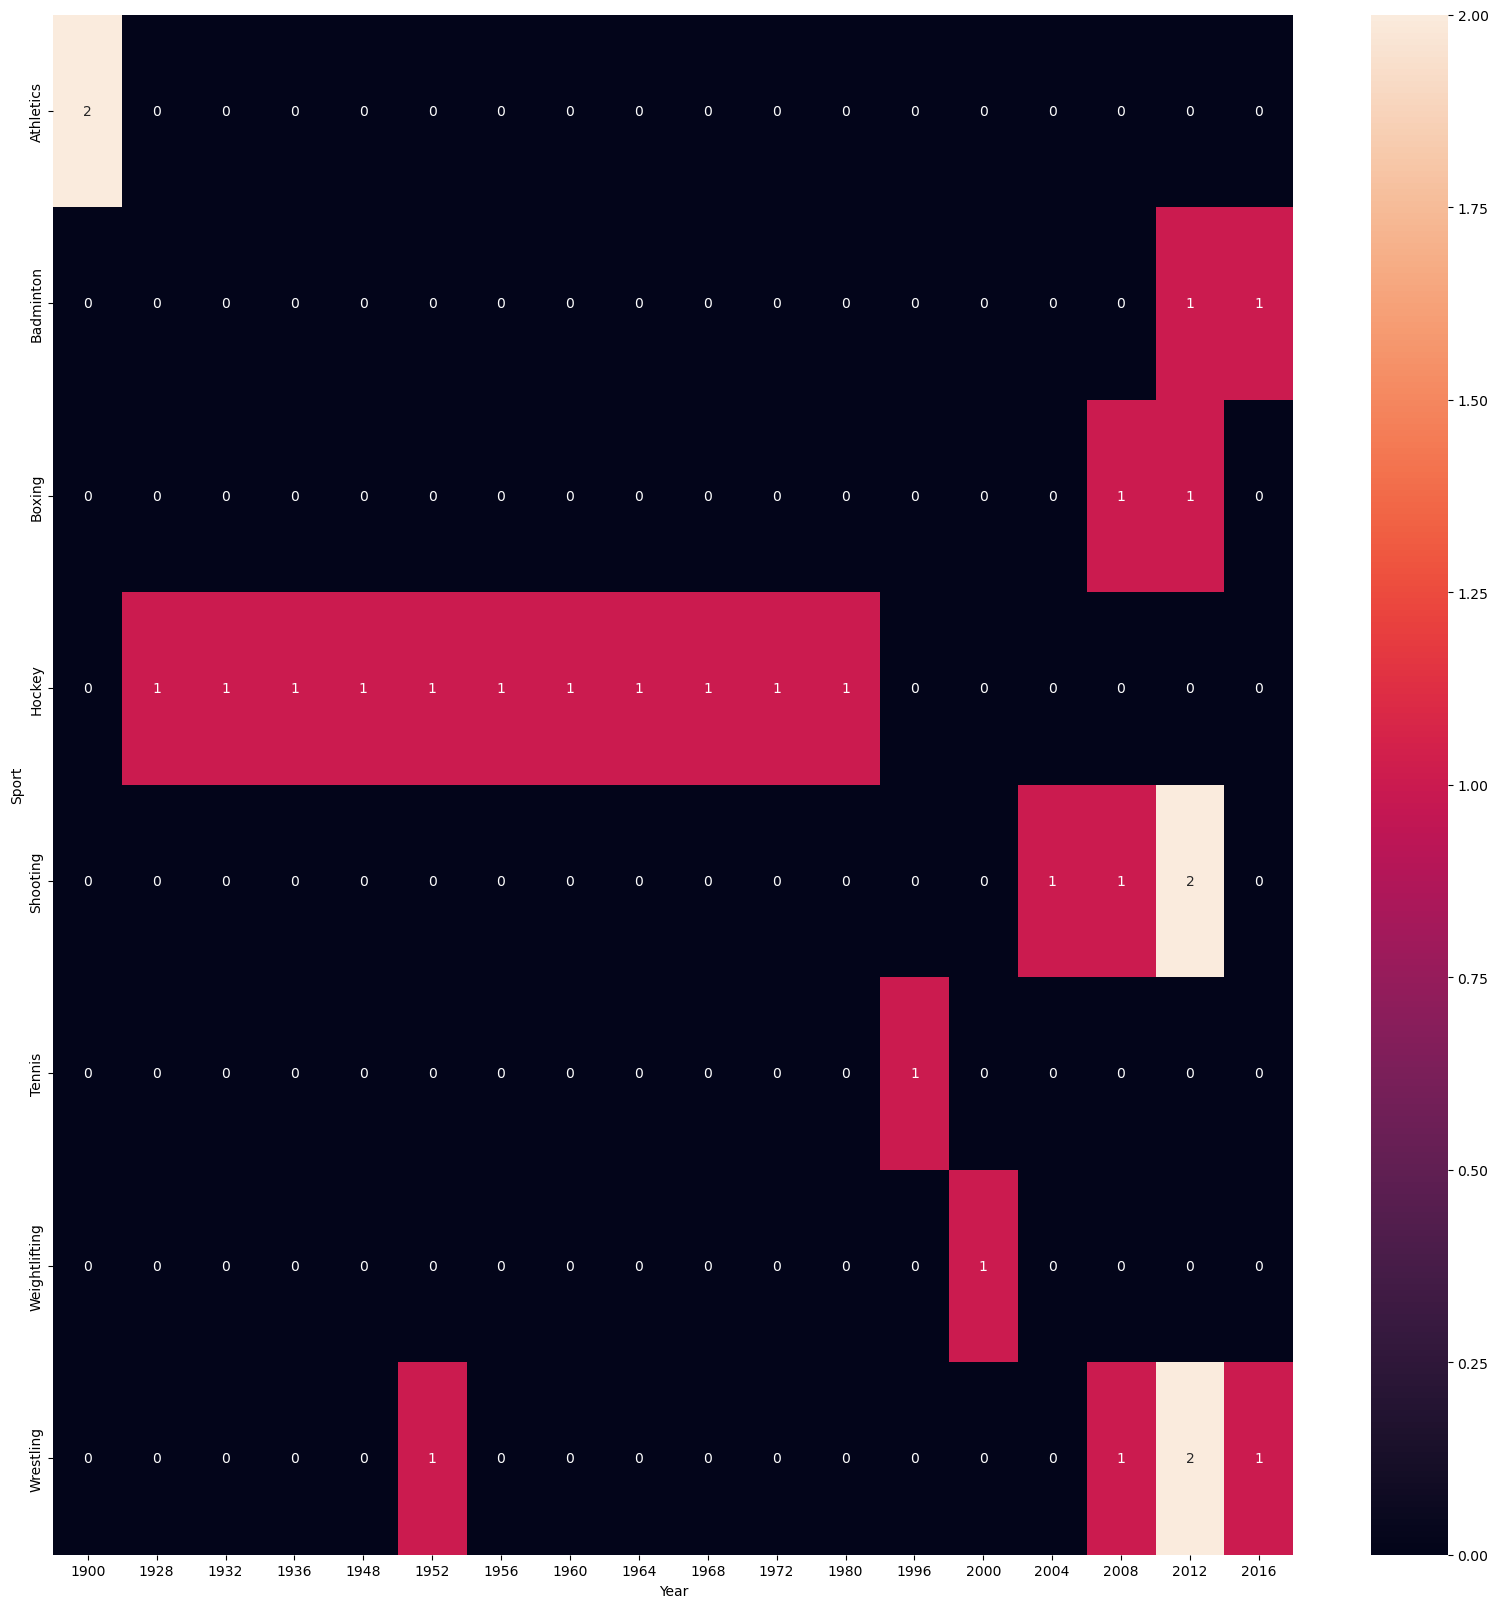

In [64]:
new_df = temp_df[temp_df['region']=='India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [65]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region']== country]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [66]:
most_successful(df,'USA')

Name  Medals      Sport
0                            Michael Fred Phelps, II      28   Swimming
30                                Ryan Steven Lochte      12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12   Swimming
61                     Natalie Anne Coughlin (-Hall)      12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)      12   Swimming
86                    Matthew Nicholas "Matt" Biondi      11   Swimming
98                              Carl Townsend Osburn      11   Shooting
114                                Mark Andrew Spitz      11   Swimming
126                      Raymond Clarence "Ray" Ewry      10  Athletics
136                   Frederick Carlton "Carl" Lewis      10  Athletics
146                             Gary Wayne Hall, Jr.      10   Swimming
156                           Allyson Michelle Felix       9  Athletics
166                           Martin Joseph Sheridan       9  Athletics
181                        Shirley Frances Babashoff       9   Swimming
192                           Nathan Ghar-Jun Adrian       8   Swimming

In [67]:
print("athlete-wise analysis")

athlete-wise analysis


In [68]:
import plotly.figure_factory as ff

In [69]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [70]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()


In [71]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age',"Gold medalist","Silver Medalist","Bronze Medalist"],show_hist=False,show_rug=False)
fig.show()

In [72]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
        temp_df = athlete_df[athlete_df['Sport'] == sport]
        x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
        name.append(sport)

In [73]:
fig=ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig.show()

In [74]:
athlete_df['Medal'].fillna('No Medal',inplace =True)

<Axes: xlabel='Weight', ylabel='Height'>

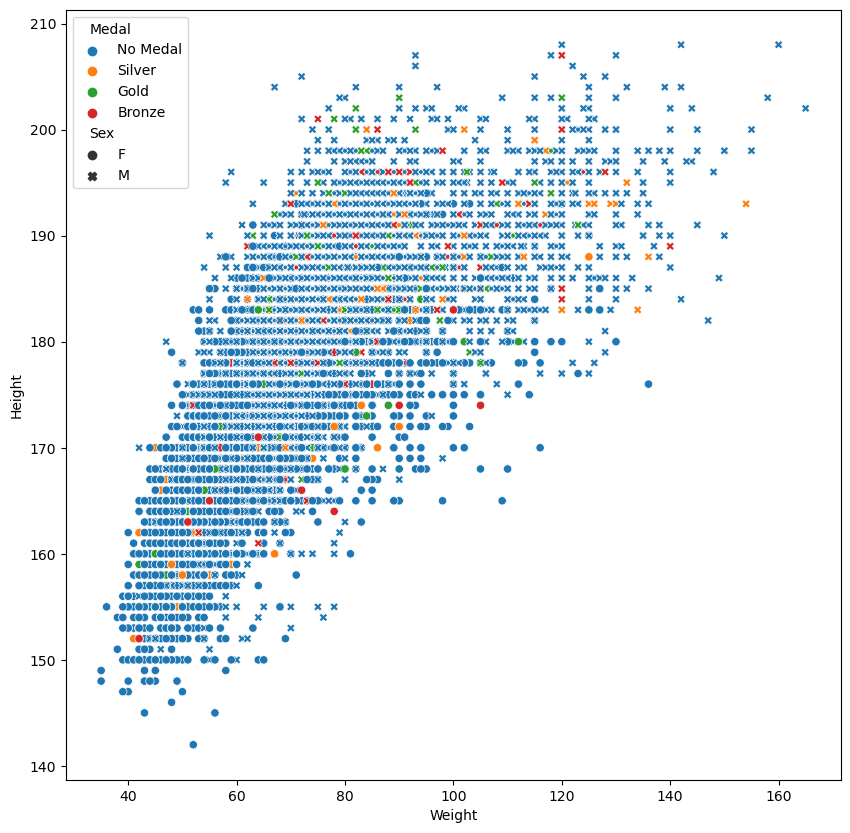

In [77]:
plt.figure(figsize=(10, 10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(data=temp_df, x='Weight', y='Height', hue='Medal',style='Sex',s=100)


In [78]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [82]:
final = men.merge(women,on='Year',how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)


In [83]:
final.fillna(0,inplace=True)

In [84]:
fig = px.line(final,x="Year",y=["Male","Female"])
fig.show()